In [93]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision
import torchvision.transforms

import matplotlib.pyplot as plt

mnist_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=mnist_transforms, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, transform=mnist_transforms, download=True)

In [144]:
trainloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True, num_workers=2)

class MLP_MNIST(nn.Module):
    
    def __init__(self,dims,outsize,dropout=[1,1]):
        super(MLP_MNIST,self).__init__()
        self.fc1 = nn.Linear(dims[0],dims[1])
        self.dropout1 = nn.Dropout(p=dropout[0])
        self.fc2 = nn.Linear(dims[1],dims[2])
        self.dropout2 = nn.Dropout(p=dropout[1])
        self.fc3 = nn.Linear(dims[2],outsize)
        
    def forward(self,x):
        a1 = self.fc1(x)
        d1 = self.dropout1(a1)
        h1 = nn.functional.relu(d1)
        
        a2 = self.fc2(h1)
        d2 = self.dropout2(a2)
        h2 = nn.functional.relu(d2)
        
        logits = self.fc3(h2)
        
        return logits
    
    def prediction(self,logits):
        
        values, indices = torch.max(logits.data,1)
        
        return values, indices

mmm = MLP_MNIST([28*28,500,200],10)

loss_crit = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mmm.parameters(), lr=1e-4)
NUMEPOCHS=10




Epoch : 0 Loss : 2.302 
Epoch : 1 Loss : 2.302 
Epoch : 2 Loss : 2.302 
Epoch : 3 Loss : 2.303 
Epoch : 4 Loss : 2.303 
Epoch : 5 Loss : 2.303 
Epoch : 6 Loss : 2.304 
Epoch : 7 Loss : 2.304 
Epoch : 8 Loss : 2.304 
Epoch : 9 Loss : 2.304 


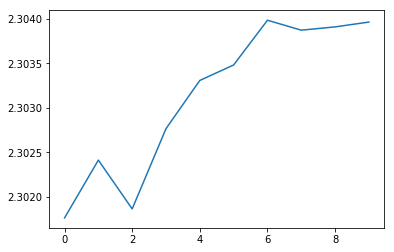

In [88]:
#Zero Weight Initialization

ZeroInitNet = MLP_MNIST([28*28,500,200],10)

loss_crit = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ZeroInitNet.parameters(), lr=1e-4)
NUMEPOCHS=10

params = list(ZeroInitNet.parameters())

for p in params:
    nn.init.uniform(p,0,0)
    
epoch_loss = [0] * NUMEPOCHS
for epoch in range(NUMEPOCHS):
    losses = []
    for batch_index, (inputs, targets) in enumerate(trainloader):
        x, targets = Variable(inputs.view([-1,28*28])), Variable(targets)

        logits = ZeroInitNet.forward(x)
    
        loss = loss_crit(logits,targets)
    
        loss.backward()
        optimizer.step()

        losses.append(loss.data[0])
    epoch_loss[epoch] = np.mean(losses)
    print('Epoch : %d Loss : %.3f ' % (epoch, np.mean(losses)))

plt.plot(epoch_loss)
plt.show()
    

Epoch : 0 Loss : 87.551 
Epoch : 1 Loss : 2.335 
Epoch : 2 Loss : 2.316 
Epoch : 3 Loss : 2.315 
Epoch : 4 Loss : 2.407 
Epoch : 5 Loss : 2.316 
Epoch : 6 Loss : 2.316 
Epoch : 7 Loss : 2.317 
Epoch : 8 Loss : 2.315 
Epoch : 9 Loss : 2.317 


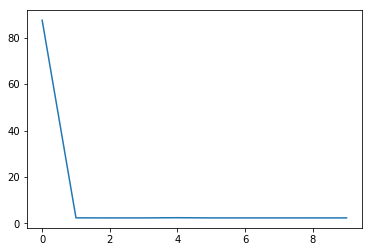

In [89]:
#Normal Weight Initialization

NormInitNet = MLP_MNIST([28*28,500,200],10)

loss_crit = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(NormInitNet.parameters(), lr=1e-4)
NUMEPOCHS=10
params = list(NormInitNet.parameters())

for p in params:
    if len(p.size()) > 1:
        nn.init.normal(p,0,1)
    else:
        nn.init.uniform(p,0,0)
    
epoch_loss = [0] * NUMEPOCHS
for epoch in range(NUMEPOCHS):
    losses = []
    for batch_index, (inputs, targets) in enumerate(trainloader):
        x, targets = Variable(inputs.view([-1,28*28])), Variable(targets)

        logits = NormInitNet.forward(x)
    
        loss = loss_crit(logits,targets)
    
        loss.backward()
        optimizer.step()

        losses.append(loss.data[0])
    epoch_loss[epoch] = np.mean(losses)
    print('Epoch : %d Loss : %.3f ' % (epoch, np.mean(losses)))

plt.plot(epoch_loss)
plt.show()

Epoch : 0 Loss : 0.979 
Epoch : 1 Loss : 0.708 
Epoch : 2 Loss : 0.351 
Epoch : 3 Loss : 0.287 
Epoch : 4 Loss : 0.253 
Epoch : 5 Loss : 0.238 
Epoch : 6 Loss : 0.222 
Epoch : 7 Loss : 0.218 
Epoch : 8 Loss : 0.205 
Epoch : 9 Loss : 0.198 


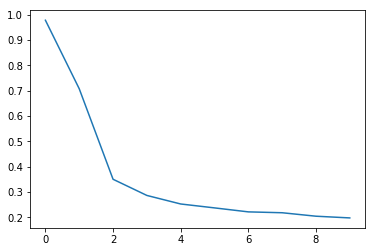

In [90]:
#Glorot Weight Initialization

GlorotInitNet = MLP_MNIST([28*28,500,200],10)

loss_crit = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(GlorotInitNet.parameters(), lr=1e-4)
NUMEPOCHS=10
params = list(GlorotInitNet.parameters())

for p in params:
    if len(p.size()) > 1:
        dl = np.sqrt(6.0/(p.size()[0]+p.size()[1]))
        nn.init.uniform(p,-dl,dl)
    else:
        nn.init.uniform(p,0,0)
    
epoch_loss = [0] * NUMEPOCHS
for epoch in range(NUMEPOCHS):
    losses = []
    for batch_index, (inputs, targets) in enumerate(trainloader):
        x, targets = Variable(inputs.view([-1,28*28])), Variable(targets)

        logits = GlorotInitNet.forward(x)
    
        loss = loss_crit(logits,targets)
    
        loss.backward()
        optimizer.step()

        losses.append(loss.data[0])
    epoch_loss[epoch] = np.mean(losses)
    print('Epoch : %d Loss : %.3f ' % (epoch, np.mean(losses)))

plt.plot(epoch_loss)
plt.show()

In [204]:
#returns the best instance in training of the model to be trained as well as the loss and accuracy
#for both train and val if available.
def train(model, num_epochs,trainLoader,optimizer,valLoader=None, testLoader = None):
    bestValAcc = 0
    train_accuracy = []
    val_accuracy = []
    test_accuracy = []
    for epoch in range(num_epochs):
        losses = []
        correct = 0
        total = 0
        val_correct = 0
        val_total = 0
        test_correct = 0
        test_total = 0
        model.train()
        for batch_index, (inputs, targets) in enumerate(trainLoader):
            x, targets = Variable(inputs.view([-1,28*28])), Variable(targets)

            logits = model.forward(x)
            _, preds = model.prediction(logits)
            correct += preds.eq(targets.data).sum()
            total += targets.size(0)
            loss = loss_crit(logits,targets)

            loss.backward()
            optimizer.step()
            losses.append(loss.data[0])
            epoch_loss[epoch] = np.mean(losses)
        train_accuracy.append(correct/float(total))
        
        if (valLoader != None):
            model.eval()
            for batch_index,(inputs,targets) in enumerate(valLoader):
                x, targets = Variable(inputs.view([-1,28*28])), Variable(targets)

                logits = model.forward(x)
                _, preds = model.prediction(logits)
                val_correct += preds.eq(targets.data).sum()
                val_total += targets.size(0)
            val_acc = (val_correct/float(val_total))
            val_accuracy.append(val_acc)
                            
            if val_acc > bestValAcc:
                bestNetwork = NeuralNet
                bestValAcc= val_acc
                
        if (testLoader != None):
            model.eval()
            for batch_index,(inputs,targets) in enumerate(testLoader):
                x, targets = Variable(inputs.view([-1,28*28])), Variable(targets)

                logits = model.forward(x)
                _, preds = model.prediction(logits)
                test_correct += preds.eq(targets.data).sum()
                test_total += targets.size(0)
            test_acc = (val_correct/float(val_total))
            test_accuracy.append(val_acc)
            
        if (valLoader != None and testLoader != None):
            print('Epoch : %d Loss : %.3f  Train Accuracy: %.3f Validation Accuracy: %.3f Test Accuracy: %.3f' % (epoch,epoch_loss[epoch], train_accuracy[epoch], val_accuracy[epoch], test_accuracy[epoch]))
        elif (valLoader != None and testLoader == None):
            print('Epoch : %d Loss : %.3f  Train Accuracy: %.3f Validation Accuracy: %.3f' % (epoch,epoch_loss[epoch], train_accuracy[epoch], val_accuracy[epoch]))
        else:
            print('Epoch : %d Loss : %.3f  Train Accuracy: %.3f' %(epoch, epoch_loss[epoch], train_accuracy[epoch]))
    return (bestNetwork, epoch_loss, train_accuracy, val_accuracy)
    
#Initializes
def GlorotInitialize(model):
    #Initialize parameters
    params = list(model.parameters())

    for p in params:
        if len(p.size()) > 1:
            dl = np.sqrt(6.0/(p.size()[0]+p.size()[1]))
            nn.init.uniform(p,-dl,dl)
        else:
            nn.init.uniform(p,0,0)
            
    return model
            
def hyperparamsearch(num_epochs, hparams, trainLoader, valLoader = None ):
    BestNetwork = 0
    bestValAcc = 0
    for layer in hparams['layers']:
        for lr in hparams['lr']:
            for decay in hparams['lr_decay']:
                for drop in hparams['dropout']:
                    print "Neural Net Hyper params:"
                    print "Layers: " + repr(layer)
                    print "Learning Rate: " + repr(lr)
                    print "Learning rate decay: " + repr(decay)
                    print "Dropout rate Layer 1:" + repr(drop[0]) + ", Layer 2: " + repr(drop[1])
                    epoch_loss = [0] * num_epochs
                    NeuralNet = MLP_MNIST(layer,10,drop)
                    optimizer = torch.optim.Adagrad(NeuralNet.parameters(), lr=lr,lr_decay = decay)

                    NeuralNet = GlorotInitialize(NeuralNet)
                    network, loss_history, train_accuracy, val_accuracy = train(NeuralNet,num_epochs, trainLoader,optimizer,valLoader)
                    if (max(val_accuracy) > bestValAcc):
                        bestNetwork = network
                        bestValAcc = max(val_accuracy)
                    plt.plot(train_accuracy)
                    if (valLoader != None):
                        plt.plot(val_accuracy)
                    plt.show()
                    
    return bestNetwork

In [205]:
#Learning Curves
#Split training data into test and train
TRAINSIZE = 50000
indices = list(range(TRAINSIZE))
val_percent = 0.2
split = int((1-val_percent)*TRAINSIZE)
np.random.shuffle(indices)
train_idx, valid_idx = indices[:split], indices[split:]

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)

trainloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, sampler=train_sampler, num_workers=2)
validloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, sampler=valid_sampler, num_workers=2)

testloader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True, num_workers=2)



Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 0.0001
Learning rate decay: 1e-06
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 1.080  Train Accuracy: 0.734 Validation Accuracy: 0.856
Epoch : 1 Loss : 0.506  Train Accuracy: 0.849 Validation Accuracy: 0.885
Epoch : 2 Loss : 0.410  Train Accuracy: 0.876 Validation Accuracy: 0.900
Epoch : 3 Loss : 0.365  Train Accuracy: 0.891 Validation Accuracy: 0.908
Epoch : 4 Loss : 0.327  Train Accuracy: 0.904 Validation Accuracy: 0.917
Epoch : 5 Loss : 0.297  Train Accuracy: 0.912 Validation Accuracy: 0.923
Epoch : 6 Loss : 0.276  Train Accuracy: 0.918 Validation Accuracy: 0.928
Epoch : 7 Loss : 0.255  Train Accuracy: 0.924 Validation Accuracy: 0.933
Epoch : 8 Loss : 0.241  Train Accuracy: 0.929 Validation Accuracy: 0.935
Epoch : 9 Loss : 0.228  Train Accuracy: 0.933 Validation Accuracy: 0.937
Epoch : 10 Loss : 0.218  Train Accuracy: 0.935 Validation Accuracy: 0.941
Epoch : 11 Loss : 0.207  Train Accuracy: 0.939 Validation A

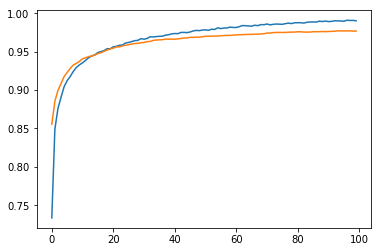

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 0.0001
Learning rate decay: 1e-06
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 1.035  Train Accuracy: 0.755 Validation Accuracy: 0.862
Epoch : 1 Loss : 0.472  Train Accuracy: 0.861 Validation Accuracy: 0.894
Epoch : 2 Loss : 0.382  Train Accuracy: 0.886 Validation Accuracy: 0.904
Epoch : 3 Loss : 0.340  Train Accuracy: 0.900 Validation Accuracy: 0.912
Epoch : 4 Loss : 0.313  Train Accuracy: 0.908 Validation Accuracy: 0.919
Epoch : 5 Loss : 0.284  Train Accuracy: 0.916 Validation Accuracy: 0.925
Epoch : 6 Loss : 0.261  Train Accuracy: 0.924 Validation Accuracy: 0.928
Epoch : 7 Loss : 0.247  Train Accuracy: 0.927 Validation Accuracy: 0.932
Epoch : 8 Loss : 0.234  Train Accuracy: 0.931 Validation Accuracy: 0.934
Epoch : 9 Loss : 0.220  Train Accuracy: 0.935 Validation Accuracy: 0.936
Epoch : 10 Loss : 0.208  Train Accuracy: 0.939 Validation Accuracy: 0.940
Epoch : 11 Loss : 0.200  Train Accuracy: 0.942 Validation

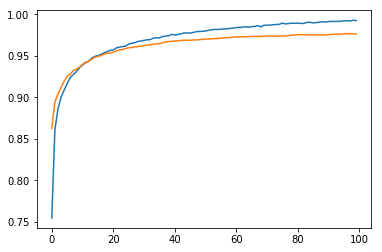

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 0.0001
Learning rate decay: 1e-06
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 0.997  Train Accuracy: 0.765 Validation Accuracy: 0.867
Epoch : 1 Loss : 0.450  Train Accuracy: 0.867 Validation Accuracy: 0.893
Epoch : 2 Loss : 0.364  Train Accuracy: 0.893 Validation Accuracy: 0.905
Epoch : 3 Loss : 0.326  Train Accuracy: 0.905 Validation Accuracy: 0.914
Epoch : 4 Loss : 0.297  Train Accuracy: 0.915 Validation Accuracy: 0.920
Epoch : 5 Loss : 0.274  Train Accuracy: 0.921 Validation Accuracy: 0.925
Epoch : 6 Loss : 0.253  Train Accuracy: 0.926 Validation Accuracy: 0.928
Epoch : 7 Loss : 0.237  Train Accuracy: 0.931 Validation Accuracy: 0.931
Epoch : 8 Loss : 0.224  Train Accuracy: 0.934 Validation Accuracy: 0.933
Epoch : 9 Loss : 0.213  Train Accuracy: 0.938 Validation Accuracy: 0.936
Epoch : 10 Loss : 0.203  Train Accuracy: 0.940 Validation Accuracy: 0.939
Epoch : 11 Loss : 0.193  Train Accuracy: 0.943 Validation A

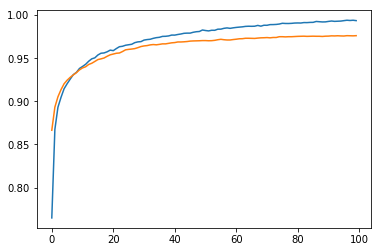

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 0.0001
Learning rate decay: 1e-05
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 1.111  Train Accuracy: 0.721 Validation Accuracy: 0.852
Epoch : 1 Loss : 0.529  Train Accuracy: 0.840 Validation Accuracy: 0.885
Epoch : 2 Loss : 0.424  Train Accuracy: 0.872 Validation Accuracy: 0.900
Epoch : 3 Loss : 0.372  Train Accuracy: 0.889 Validation Accuracy: 0.907
Epoch : 4 Loss : 0.333  Train Accuracy: 0.901 Validation Accuracy: 0.914
Epoch : 5 Loss : 0.303  Train Accuracy: 0.910 Validation Accuracy: 0.920
Epoch : 6 Loss : 0.284  Train Accuracy: 0.916 Validation Accuracy: 0.925
Epoch : 7 Loss : 0.264  Train Accuracy: 0.921 Validation Accuracy: 0.928
Epoch : 8 Loss : 0.248  Train Accuracy: 0.926 Validation Accuracy: 0.931
Epoch : 9 Loss : 0.235  Train Accuracy: 0.930 Validation Accuracy: 0.935
Epoch : 10 Loss : 0.224  Train Accuracy: 0.935 Validation Accuracy: 0.937
Epoch : 11 Loss : 0.213  Train Accuracy: 0.938 Validation A

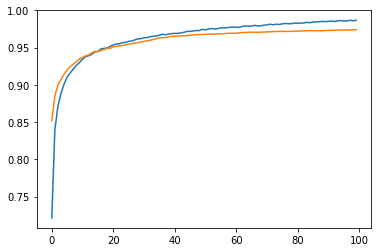

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 0.0001
Learning rate decay: 1e-05
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 1.015  Train Accuracy: 0.749 Validation Accuracy: 0.860
Epoch : 1 Loss : 0.476  Train Accuracy: 0.858 Validation Accuracy: 0.888
Epoch : 2 Loss : 0.391  Train Accuracy: 0.882 Validation Accuracy: 0.900
Epoch : 3 Loss : 0.348  Train Accuracy: 0.897 Validation Accuracy: 0.911
Epoch : 4 Loss : 0.310  Train Accuracy: 0.909 Validation Accuracy: 0.919
Epoch : 5 Loss : 0.289  Train Accuracy: 0.915 Validation Accuracy: 0.924
Epoch : 6 Loss : 0.267  Train Accuracy: 0.923 Validation Accuracy: 0.928
Epoch : 7 Loss : 0.251  Train Accuracy: 0.927 Validation Accuracy: 0.930
Epoch : 8 Loss : 0.238  Train Accuracy: 0.929 Validation Accuracy: 0.934
Epoch : 9 Loss : 0.224  Train Accuracy: 0.934 Validation Accuracy: 0.937
Epoch : 10 Loss : 0.213  Train Accuracy: 0.938 Validation Accuracy: 0.939
Epoch : 11 Loss : 0.206  Train Accuracy: 0.939 Validation

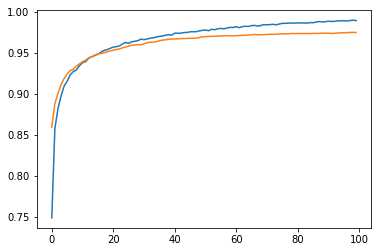

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 0.0001
Learning rate decay: 1e-05
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 1.025  Train Accuracy: 0.760 Validation Accuracy: 0.861
Epoch : 1 Loss : 0.463  Train Accuracy: 0.867 Validation Accuracy: 0.890
Epoch : 2 Loss : 0.375  Train Accuracy: 0.889 Validation Accuracy: 0.903
Epoch : 3 Loss : 0.335  Train Accuracy: 0.903 Validation Accuracy: 0.912
Epoch : 4 Loss : 0.307  Train Accuracy: 0.912 Validation Accuracy: 0.918
Epoch : 5 Loss : 0.288  Train Accuracy: 0.918 Validation Accuracy: 0.921
Epoch : 6 Loss : 0.264  Train Accuracy: 0.924 Validation Accuracy: 0.927
Epoch : 7 Loss : 0.249  Train Accuracy: 0.926 Validation Accuracy: 0.930
Epoch : 8 Loss : 0.236  Train Accuracy: 0.931 Validation Accuracy: 0.931
Epoch : 9 Loss : 0.221  Train Accuracy: 0.935 Validation Accuracy: 0.934
Epoch : 10 Loss : 0.209  Train Accuracy: 0.938 Validation Accuracy: 0.936
Epoch : 11 Loss : 0.201  Train Accuracy: 0.941 Validation A

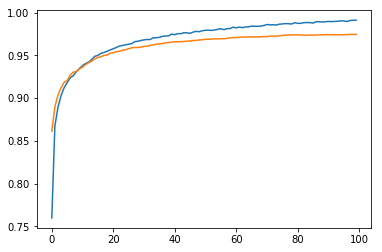

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 5e-05
Learning rate decay: 1e-06
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 1.656  Train Accuracy: 0.607 Validation Accuracy: 0.797
Epoch : 1 Loss : 1.036  Train Accuracy: 0.766 Validation Accuracy: 0.829
Epoch : 2 Loss : 0.760  Train Accuracy: 0.804 Validation Accuracy: 0.847
Epoch : 3 Loss : 0.626  Train Accuracy: 0.823 Validation Accuracy: 0.862
Epoch : 4 Loss : 0.546  Train Accuracy: 0.840 Validation Accuracy: 0.873
Epoch : 5 Loss : 0.496  Train Accuracy: 0.853 Validation Accuracy: 0.882
Epoch : 6 Loss : 0.465  Train Accuracy: 0.859 Validation Accuracy: 0.888
Epoch : 7 Loss : 0.438  Train Accuracy: 0.867 Validation Accuracy: 0.894
Epoch : 8 Loss : 0.414  Train Accuracy: 0.875 Validation Accuracy: 0.897
Epoch : 9 Loss : 0.398  Train Accuracy: 0.881 Validation Accuracy: 0.902
Epoch : 10 Loss : 0.382  Train Accuracy: 0.884 Validation Accuracy: 0.904
Epoch : 11 Loss : 0.369  Train Accuracy: 0.889 Validation Ac

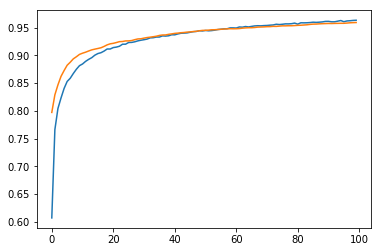

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 5e-05
Learning rate decay: 1e-06
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 1.600  Train Accuracy: 0.611 Validation Accuracy: 0.789
Epoch : 1 Loss : 0.988  Train Accuracy: 0.779 Validation Accuracy: 0.824
Epoch : 2 Loss : 0.731  Train Accuracy: 0.811 Validation Accuracy: 0.850
Epoch : 3 Loss : 0.600  Train Accuracy: 0.835 Validation Accuracy: 0.865
Epoch : 4 Loss : 0.527  Train Accuracy: 0.848 Validation Accuracy: 0.876
Epoch : 5 Loss : 0.476  Train Accuracy: 0.859 Validation Accuracy: 0.885
Epoch : 6 Loss : 0.441  Train Accuracy: 0.868 Validation Accuracy: 0.889
Epoch : 7 Loss : 0.419  Train Accuracy: 0.874 Validation Accuracy: 0.894
Epoch : 8 Loss : 0.397  Train Accuracy: 0.882 Validation Accuracy: 0.898
Epoch : 9 Loss : 0.380  Train Accuracy: 0.886 Validation Accuracy: 0.901
Epoch : 10 Loss : 0.365  Train Accuracy: 0.891 Validation Accuracy: 0.905
Epoch : 11 Loss : 0.357  Train Accuracy: 0.894 Validation 

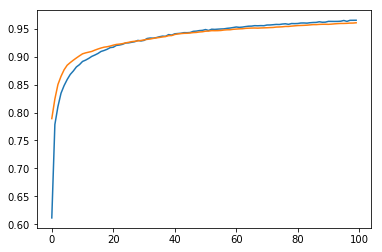

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 5e-05
Learning rate decay: 1e-06
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 1.571  Train Accuracy: 0.656 Validation Accuracy: 0.793
Epoch : 1 Loss : 0.941  Train Accuracy: 0.793 Validation Accuracy: 0.830
Epoch : 2 Loss : 0.686  Train Accuracy: 0.827 Validation Accuracy: 0.850
Epoch : 3 Loss : 0.560  Train Accuracy: 0.848 Validation Accuracy: 0.863
Epoch : 4 Loss : 0.488  Train Accuracy: 0.862 Validation Accuracy: 0.874
Epoch : 5 Loss : 0.445  Train Accuracy: 0.871 Validation Accuracy: 0.883
Epoch : 6 Loss : 0.415  Train Accuracy: 0.878 Validation Accuracy: 0.889
Epoch : 7 Loss : 0.391  Train Accuracy: 0.885 Validation Accuracy: 0.893
Epoch : 8 Loss : 0.376  Train Accuracy: 0.889 Validation Accuracy: 0.897
Epoch : 9 Loss : 0.363  Train Accuracy: 0.894 Validation Accuracy: 0.900
Epoch : 10 Loss : 0.350  Train Accuracy: 0.899 Validation Accuracy: 0.903
Epoch : 11 Loss : 0.341  Train Accuracy: 0.900 Validation Ac

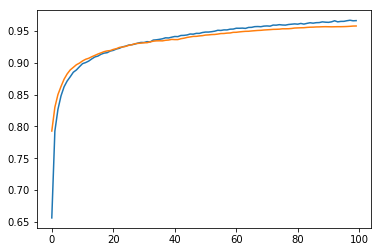

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 5e-05
Learning rate decay: 1e-05
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 1.640  Train Accuracy: 0.593 Validation Accuracy: 0.795
Epoch : 1 Loss : 1.019  Train Accuracy: 0.767 Validation Accuracy: 0.829
Epoch : 2 Loss : 0.754  Train Accuracy: 0.802 Validation Accuracy: 0.849
Epoch : 3 Loss : 0.623  Train Accuracy: 0.822 Validation Accuracy: 0.862
Epoch : 4 Loss : 0.546  Train Accuracy: 0.838 Validation Accuracy: 0.873
Epoch : 5 Loss : 0.498  Train Accuracy: 0.851 Validation Accuracy: 0.881
Epoch : 6 Loss : 0.466  Train Accuracy: 0.858 Validation Accuracy: 0.887
Epoch : 7 Loss : 0.442  Train Accuracy: 0.867 Validation Accuracy: 0.892
Epoch : 8 Loss : 0.421  Train Accuracy: 0.872 Validation Accuracy: 0.897
Epoch : 9 Loss : 0.402  Train Accuracy: 0.879 Validation Accuracy: 0.899
Epoch : 10 Loss : 0.388  Train Accuracy: 0.884 Validation Accuracy: 0.902
Epoch : 11 Loss : 0.378  Train Accuracy: 0.886 Validation Ac

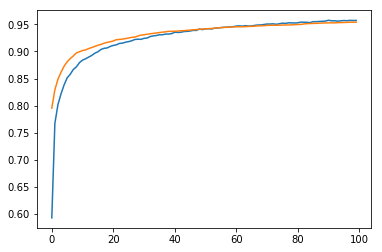

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 5e-05
Learning rate decay: 1e-05
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 1.609  Train Accuracy: 0.628 Validation Accuracy: 0.797
Epoch : 1 Loss : 0.980  Train Accuracy: 0.784 Validation Accuracy: 0.835
Epoch : 2 Loss : 0.717  Train Accuracy: 0.820 Validation Accuracy: 0.854
Epoch : 3 Loss : 0.585  Train Accuracy: 0.839 Validation Accuracy: 0.867
Epoch : 4 Loss : 0.510  Train Accuracy: 0.853 Validation Accuracy: 0.878
Epoch : 5 Loss : 0.465  Train Accuracy: 0.863 Validation Accuracy: 0.887
Epoch : 6 Loss : 0.434  Train Accuracy: 0.870 Validation Accuracy: 0.890
Epoch : 7 Loss : 0.412  Train Accuracy: 0.875 Validation Accuracy: 0.895
Epoch : 8 Loss : 0.395  Train Accuracy: 0.879 Validation Accuracy: 0.898
Epoch : 9 Loss : 0.383  Train Accuracy: 0.884 Validation Accuracy: 0.900
Epoch : 10 Loss : 0.371  Train Accuracy: 0.889 Validation Accuracy: 0.903
Epoch : 11 Loss : 0.360  Train Accuracy: 0.892 Validation 

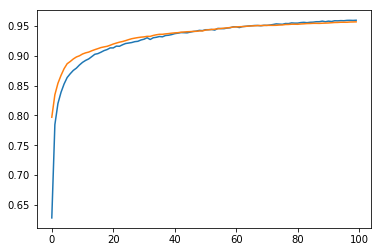

Neural Net Hyper params:
Layers: [784, 500, 250]
Learning Rate: 5e-05
Learning rate decay: 1e-05
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 1.523  Train Accuracy: 0.652 Validation Accuracy: 0.794
Epoch : 1 Loss : 0.907  Train Accuracy: 0.799 Validation Accuracy: 0.835
Epoch : 2 Loss : 0.665  Train Accuracy: 0.834 Validation Accuracy: 0.855
Epoch : 3 Loss : 0.548  Train Accuracy: 0.851 Validation Accuracy: 0.868
Epoch : 4 Loss : 0.480  Train Accuracy: 0.864 Validation Accuracy: 0.878
Epoch : 5 Loss : 0.436  Train Accuracy: 0.873 Validation Accuracy: 0.886
Epoch : 6 Loss : 0.410  Train Accuracy: 0.879 Validation Accuracy: 0.891
Epoch : 7 Loss : 0.390  Train Accuracy: 0.883 Validation Accuracy: 0.896
Epoch : 8 Loss : 0.374  Train Accuracy: 0.890 Validation Accuracy: 0.899
Epoch : 9 Loss : 0.359  Train Accuracy: 0.894 Validation Accuracy: 0.901
Epoch : 10 Loss : 0.349  Train Accuracy: 0.896 Validation Accuracy: 0.904
Epoch : 11 Loss : 0.339  Train Accuracy: 0.901 Validation Ac

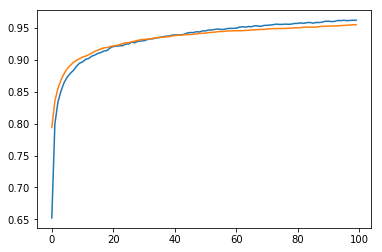

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 0.0001
Learning rate decay: 1e-06
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 0.804  Train Accuracy: 0.797 Validation Accuracy: 0.886
Epoch : 1 Loss : 0.382  Train Accuracy: 0.886 Validation Accuracy: 0.909
Epoch : 2 Loss : 0.320  Train Accuracy: 0.908 Validation Accuracy: 0.921
Epoch : 3 Loss : 0.273  Train Accuracy: 0.922 Validation Accuracy: 0.928
Epoch : 4 Loss : 0.241  Train Accuracy: 0.930 Validation Accuracy: 0.933
Epoch : 5 Loss : 0.215  Train Accuracy: 0.936 Validation Accuracy: 0.938
Epoch : 6 Loss : 0.197  Train Accuracy: 0.943 Validation Accuracy: 0.944
Epoch : 7 Loss : 0.180  Train Accuracy: 0.947 Validation Accuracy: 0.948
Epoch : 8 Loss : 0.165  Train Accuracy: 0.951 Validation Accuracy: 0.951
Epoch : 9 Loss : 0.153  Train Accuracy: 0.954 Validation Accuracy: 0.953
Epoch : 10 Loss : 0.143  Train Accuracy: 0.957 Validation Accuracy: 0.954
Epoch : 11 Loss : 0.134  Train Accuracy: 0.960 Validation A

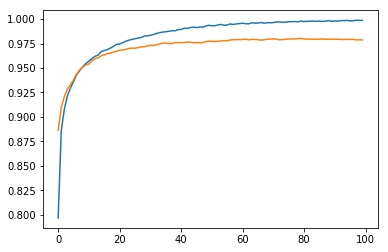

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 0.0001
Learning rate decay: 1e-06
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 0.773  Train Accuracy: 0.808 Validation Accuracy: 0.886
Epoch : 1 Loss : 0.364  Train Accuracy: 0.893 Validation Accuracy: 0.910
Epoch : 2 Loss : 0.304  Train Accuracy: 0.913 Validation Accuracy: 0.921
Epoch : 3 Loss : 0.263  Train Accuracy: 0.924 Validation Accuracy: 0.929
Epoch : 4 Loss : 0.234  Train Accuracy: 0.932 Validation Accuracy: 0.933
Epoch : 5 Loss : 0.208  Train Accuracy: 0.939 Validation Accuracy: 0.941
Epoch : 6 Loss : 0.188  Train Accuracy: 0.945 Validation Accuracy: 0.946
Epoch : 7 Loss : 0.173  Train Accuracy: 0.950 Validation Accuracy: 0.949
Epoch : 8 Loss : 0.159  Train Accuracy: 0.953 Validation Accuracy: 0.952
Epoch : 9 Loss : 0.145  Train Accuracy: 0.958 Validation Accuracy: 0.954
Epoch : 10 Loss : 0.136  Train Accuracy: 0.960 Validation Accuracy: 0.955
Epoch : 11 Loss : 0.128  Train Accuracy: 0.962 Validation

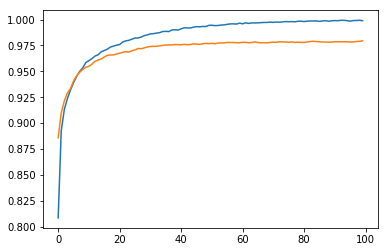

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 0.0001
Learning rate decay: 1e-06
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 0.752  Train Accuracy: 0.814 Validation Accuracy: 0.889
Epoch : 1 Loss : 0.349  Train Accuracy: 0.897 Validation Accuracy: 0.908
Epoch : 2 Loss : 0.296  Train Accuracy: 0.915 Validation Accuracy: 0.921
Epoch : 3 Loss : 0.261  Train Accuracy: 0.926 Validation Accuracy: 0.928
Epoch : 4 Loss : 0.230  Train Accuracy: 0.933 Validation Accuracy: 0.936
Epoch : 5 Loss : 0.205  Train Accuracy: 0.941 Validation Accuracy: 0.940
Epoch : 6 Loss : 0.188  Train Accuracy: 0.944 Validation Accuracy: 0.944
Epoch : 7 Loss : 0.170  Train Accuracy: 0.950 Validation Accuracy: 0.949
Epoch : 8 Loss : 0.156  Train Accuracy: 0.954 Validation Accuracy: 0.952
Epoch : 9 Loss : 0.141  Train Accuracy: 0.958 Validation Accuracy: 0.955
Epoch : 10 Loss : 0.131  Train Accuracy: 0.961 Validation Accuracy: 0.957
Epoch : 11 Loss : 0.123  Train Accuracy: 0.964 Validation A

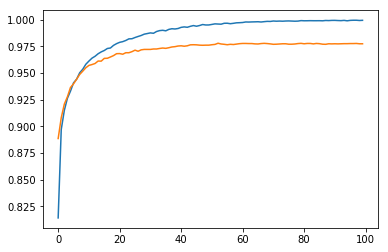

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 0.0001
Learning rate decay: 1e-05
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 0.813  Train Accuracy: 0.790 Validation Accuracy: 0.886
Epoch : 1 Loss : 0.385  Train Accuracy: 0.887 Validation Accuracy: 0.907
Epoch : 2 Loss : 0.323  Train Accuracy: 0.907 Validation Accuracy: 0.919
Epoch : 3 Loss : 0.278  Train Accuracy: 0.920 Validation Accuracy: 0.927
Epoch : 4 Loss : 0.248  Train Accuracy: 0.927 Validation Accuracy: 0.933
Epoch : 5 Loss : 0.221  Train Accuracy: 0.934 Validation Accuracy: 0.939
Epoch : 6 Loss : 0.201  Train Accuracy: 0.941 Validation Accuracy: 0.942
Epoch : 7 Loss : 0.185  Train Accuracy: 0.947 Validation Accuracy: 0.946
Epoch : 8 Loss : 0.170  Train Accuracy: 0.951 Validation Accuracy: 0.948
Epoch : 9 Loss : 0.159  Train Accuracy: 0.953 Validation Accuracy: 0.951
Epoch : 10 Loss : 0.149  Train Accuracy: 0.956 Validation Accuracy: 0.953
Epoch : 11 Loss : 0.140  Train Accuracy: 0.958 Validation A

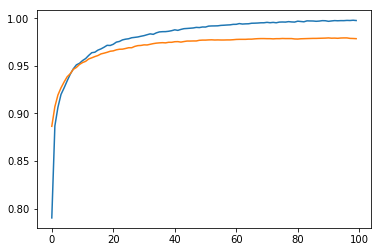

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 0.0001
Learning rate decay: 1e-05
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 0.790  Train Accuracy: 0.806 Validation Accuracy: 0.889
Epoch : 1 Loss : 0.364  Train Accuracy: 0.892 Validation Accuracy: 0.908
Epoch : 2 Loss : 0.305  Train Accuracy: 0.912 Validation Accuracy: 0.918
Epoch : 3 Loss : 0.269  Train Accuracy: 0.923 Validation Accuracy: 0.927
Epoch : 4 Loss : 0.237  Train Accuracy: 0.930 Validation Accuracy: 0.932
Epoch : 5 Loss : 0.211  Train Accuracy: 0.939 Validation Accuracy: 0.938
Epoch : 6 Loss : 0.194  Train Accuracy: 0.944 Validation Accuracy: 0.943
Epoch : 7 Loss : 0.177  Train Accuracy: 0.948 Validation Accuracy: 0.946
Epoch : 8 Loss : 0.162  Train Accuracy: 0.953 Validation Accuracy: 0.952
Epoch : 9 Loss : 0.153  Train Accuracy: 0.955 Validation Accuracy: 0.952
Epoch : 10 Loss : 0.142  Train Accuracy: 0.958 Validation Accuracy: 0.954
Epoch : 11 Loss : 0.133  Train Accuracy: 0.961 Validation

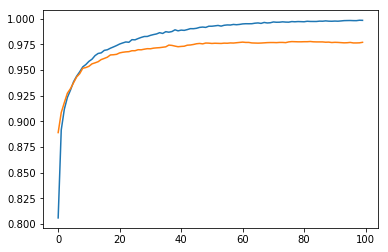

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 0.0001
Learning rate decay: 1e-05
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 0.758  Train Accuracy: 0.814 Validation Accuracy: 0.886
Epoch : 1 Loss : 0.353  Train Accuracy: 0.897 Validation Accuracy: 0.907
Epoch : 2 Loss : 0.299  Train Accuracy: 0.915 Validation Accuracy: 0.922
Epoch : 3 Loss : 0.260  Train Accuracy: 0.926 Validation Accuracy: 0.927
Epoch : 4 Loss : 0.227  Train Accuracy: 0.935 Validation Accuracy: 0.934
Epoch : 5 Loss : 0.207  Train Accuracy: 0.939 Validation Accuracy: 0.939
Epoch : 6 Loss : 0.186  Train Accuracy: 0.945 Validation Accuracy: 0.943
Epoch : 7 Loss : 0.169  Train Accuracy: 0.950 Validation Accuracy: 0.946
Epoch : 8 Loss : 0.156  Train Accuracy: 0.954 Validation Accuracy: 0.950
Epoch : 9 Loss : 0.143  Train Accuracy: 0.958 Validation Accuracy: 0.952
Epoch : 10 Loss : 0.133  Train Accuracy: 0.962 Validation Accuracy: 0.955
Epoch : 11 Loss : 0.125  Train Accuracy: 0.964 Validation A

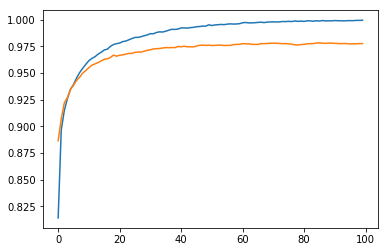

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 5e-05
Learning rate decay: 1e-06
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 1.354  Train Accuracy: 0.697 Validation Accuracy: 0.835
Epoch : 1 Loss : 0.676  Train Accuracy: 0.824 Validation Accuracy: 0.863
Epoch : 2 Loss : 0.497  Train Accuracy: 0.854 Validation Accuracy: 0.884
Epoch : 3 Loss : 0.428  Train Accuracy: 0.873 Validation Accuracy: 0.894
Epoch : 4 Loss : 0.390  Train Accuracy: 0.882 Validation Accuracy: 0.901
Epoch : 5 Loss : 0.364  Train Accuracy: 0.891 Validation Accuracy: 0.906
Epoch : 6 Loss : 0.345  Train Accuracy: 0.898 Validation Accuracy: 0.910
Epoch : 7 Loss : 0.327  Train Accuracy: 0.904 Validation Accuracy: 0.912
Epoch : 8 Loss : 0.310  Train Accuracy: 0.910 Validation Accuracy: 0.916
Epoch : 9 Loss : 0.296  Train Accuracy: 0.915 Validation Accuracy: 0.919
Epoch : 10 Loss : 0.287  Train Accuracy: 0.916 Validation Accuracy: 0.922
Epoch : 11 Loss : 0.275  Train Accuracy: 0.920 Validation Ac

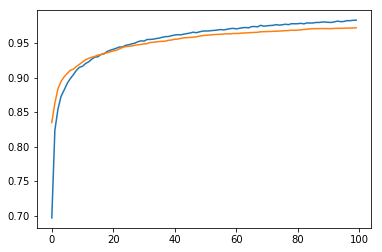

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 5e-05
Learning rate decay: 1e-06
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 1.302  Train Accuracy: 0.710 Validation Accuracy: 0.832
Epoch : 1 Loss : 0.644  Train Accuracy: 0.834 Validation Accuracy: 0.865
Epoch : 2 Loss : 0.474  Train Accuracy: 0.863 Validation Accuracy: 0.883
Epoch : 3 Loss : 0.410  Train Accuracy: 0.878 Validation Accuracy: 0.893
Epoch : 4 Loss : 0.373  Train Accuracy: 0.889 Validation Accuracy: 0.903
Epoch : 5 Loss : 0.347  Train Accuracy: 0.898 Validation Accuracy: 0.906
Epoch : 6 Loss : 0.328  Train Accuracy: 0.905 Validation Accuracy: 0.911
Epoch : 7 Loss : 0.314  Train Accuracy: 0.909 Validation Accuracy: 0.914
Epoch : 8 Loss : 0.302  Train Accuracy: 0.912 Validation Accuracy: 0.916
Epoch : 9 Loss : 0.287  Train Accuracy: 0.919 Validation Accuracy: 0.920
Epoch : 10 Loss : 0.274  Train Accuracy: 0.921 Validation Accuracy: 0.921
Epoch : 11 Loss : 0.266  Train Accuracy: 0.924 Validation 

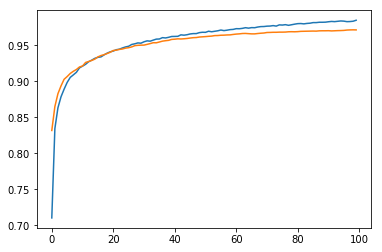

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 5e-05
Learning rate decay: 1e-06
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 1.295  Train Accuracy: 0.735 Validation Accuracy: 0.844
Epoch : 1 Loss : 0.613  Train Accuracy: 0.852 Validation Accuracy: 0.870
Epoch : 2 Loss : 0.446  Train Accuracy: 0.873 Validation Accuracy: 0.883
Epoch : 3 Loss : 0.385  Train Accuracy: 0.888 Validation Accuracy: 0.893
Epoch : 4 Loss : 0.355  Train Accuracy: 0.894 Validation Accuracy: 0.899
Epoch : 5 Loss : 0.334  Train Accuracy: 0.902 Validation Accuracy: 0.905
Epoch : 6 Loss : 0.316  Train Accuracy: 0.907 Validation Accuracy: 0.912
Epoch : 7 Loss : 0.308  Train Accuracy: 0.912 Validation Accuracy: 0.916
Epoch : 8 Loss : 0.292  Train Accuracy: 0.916 Validation Accuracy: 0.918
Epoch : 9 Loss : 0.280  Train Accuracy: 0.920 Validation Accuracy: 0.921
Epoch : 10 Loss : 0.272  Train Accuracy: 0.922 Validation Accuracy: 0.923
Epoch : 11 Loss : 0.258  Train Accuracy: 0.927 Validation Ac

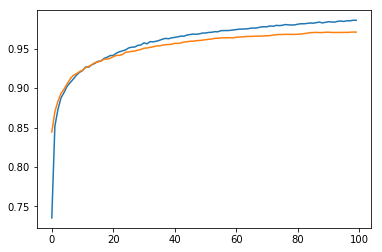

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 5e-05
Learning rate decay: 1e-05
Dropout rate Layer 1:0.2, Layer 2: 0.2
Epoch : 0 Loss : 1.330  Train Accuracy: 0.702 Validation Accuracy: 0.827
Epoch : 1 Loss : 0.664  Train Accuracy: 0.828 Validation Accuracy: 0.861
Epoch : 2 Loss : 0.491  Train Accuracy: 0.857 Validation Accuracy: 0.882
Epoch : 3 Loss : 0.422  Train Accuracy: 0.874 Validation Accuracy: 0.892
Epoch : 4 Loss : 0.385  Train Accuracy: 0.886 Validation Accuracy: 0.899
Epoch : 5 Loss : 0.365  Train Accuracy: 0.892 Validation Accuracy: 0.904
Epoch : 6 Loss : 0.344  Train Accuracy: 0.898 Validation Accuracy: 0.908
Epoch : 7 Loss : 0.329  Train Accuracy: 0.905 Validation Accuracy: 0.912
Epoch : 8 Loss : 0.315  Train Accuracy: 0.907 Validation Accuracy: 0.916
Epoch : 9 Loss : 0.301  Train Accuracy: 0.913 Validation Accuracy: 0.920
Epoch : 10 Loss : 0.290  Train Accuracy: 0.918 Validation Accuracy: 0.922
Epoch : 11 Loss : 0.279  Train Accuracy: 0.920 Validation Ac

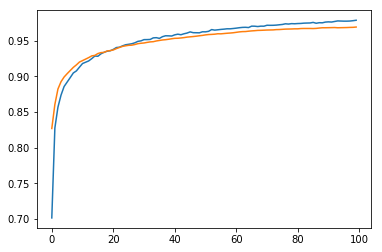

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 5e-05
Learning rate decay: 1e-05
Dropout rate Layer 1:0.15, Layer 2: 0.15
Epoch : 0 Loss : 1.292  Train Accuracy: 0.722 Validation Accuracy: 0.834
Epoch : 1 Loss : 0.623  Train Accuracy: 0.841 Validation Accuracy: 0.867
Epoch : 2 Loss : 0.463  Train Accuracy: 0.865 Validation Accuracy: 0.887
Epoch : 3 Loss : 0.405  Train Accuracy: 0.880 Validation Accuracy: 0.894
Epoch : 4 Loss : 0.373  Train Accuracy: 0.891 Validation Accuracy: 0.901
Epoch : 5 Loss : 0.350  Train Accuracy: 0.898 Validation Accuracy: 0.904
Epoch : 6 Loss : 0.331  Train Accuracy: 0.904 Validation Accuracy: 0.909
Epoch : 7 Loss : 0.318  Train Accuracy: 0.907 Validation Accuracy: 0.913
Epoch : 8 Loss : 0.309  Train Accuracy: 0.911 Validation Accuracy: 0.917
Epoch : 9 Loss : 0.293  Train Accuracy: 0.916 Validation Accuracy: 0.920
Epoch : 10 Loss : 0.282  Train Accuracy: 0.919 Validation Accuracy: 0.922
Epoch : 11 Loss : 0.274  Train Accuracy: 0.920 Validation 

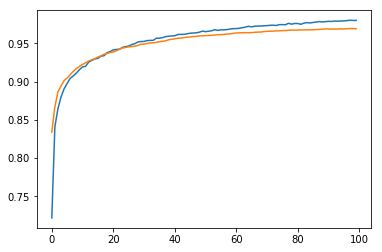

Neural Net Hyper params:
Layers: [784, 750, 500]
Learning Rate: 5e-05
Learning rate decay: 1e-05
Dropout rate Layer 1:0.1, Layer 2: 0.1
Epoch : 0 Loss : 1.261  Train Accuracy: 0.732 Validation Accuracy: 0.830
Epoch : 1 Loss : 0.615  Train Accuracy: 0.845 Validation Accuracy: 0.866
Epoch : 2 Loss : 0.455  Train Accuracy: 0.870 Validation Accuracy: 0.886
Epoch : 3 Loss : 0.390  Train Accuracy: 0.886 Validation Accuracy: 0.896
Epoch : 4 Loss : 0.356  Train Accuracy: 0.896 Validation Accuracy: 0.901
Epoch : 5 Loss : 0.331  Train Accuracy: 0.904 Validation Accuracy: 0.905
Epoch : 6 Loss : 0.316  Train Accuracy: 0.908 Validation Accuracy: 0.909
Epoch : 7 Loss : 0.302  Train Accuracy: 0.913 Validation Accuracy: 0.915
Epoch : 8 Loss : 0.290  Train Accuracy: 0.916 Validation Accuracy: 0.918
Epoch : 9 Loss : 0.276  Train Accuracy: 0.921 Validation Accuracy: 0.921
Epoch : 10 Loss : 0.270  Train Accuracy: 0.922 Validation Accuracy: 0.924
Epoch : 11 Loss : 0.260  Train Accuracy: 0.925 Validation Ac

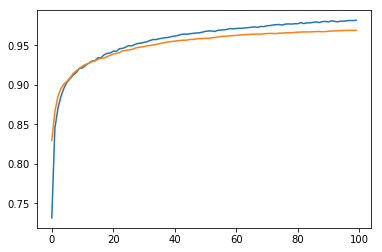

In [206]:
#Hyper parameter search

hparams = {
    "layers": [[28*28,500,250], [28*28,750,500]],
    "lr": [10e-5,5e-5],
    "lr_decay": [10e-7,10e-6],
    "dropout": [[0.2,0.2],[0.15,0.15],[0.1,0.1]]
}

bestModel = hyperparamsearch(100, hparams, trainloader, validloader)
                



## Doubling the number of parameters
Currently there are: (784+(784*750) + 750+(750*500)+ (500*10)+500)+ 10) = 970,044 parameters
(in_size+(in_size*size1) + size1 + (size1*size2) + size2 + (size2*outsize) + outsize

We would like to create a new model with twice as many parameters, 1,940,088 parameters.




In [212]:
layers = list(bestModel.parameters())
print bestValAcc
print bestModel

0
MLP_MNIST(
  (fc1): Linear(in_features=784, out_features=750)
  (dropout1): Dropout(p=0.1)
  (fc2): Linear(in_features=750, out_features=500)
  (dropout2): Dropout(p=0.1)
  (fc3): Linear(in_features=500, out_features=10)
)


In [154]:
layerDims = [784,2*750,2*500]
lr=0.0001
lr_decay = 1e-06
dropout = [0.1,0.1]

NN = MLP_MNIST(layerDims,10,dropout)
params = list(NN.parameters())
summy = 0 
for p in params:
    print p.size()
    if len(p.size()) > 1:
        summy += p.size()[0]*p.size()[1]
    else:
        summy += p.size()[0]
print summy

torch.Size([750, 784])
torch.Size([750])
torch.Size([500, 750])
torch.Size([500])
torch.Size([10, 500])
torch.Size([10])
969260


In [191]:
layerDims = [784,int(1.6*750),int(1.6*500)]
lr=0.00001
lr_decay = 1e-06
dropout = [0.1,0.1]

Double_NN = MLP_MNIST(layerDims,10,dropout)
Double_NN = GlorotInitialize(Double_NN)
optimizer = torch.optim.Adagrad(Double_NN.parameters(), lr=lr,lr_decay = decay)
(Double_NN, epoch_loss, train_accuracy, val_accuracy) = train(Double_NN,100,trainloader,optimizer,validloader)

        


Epoch : 0 Loss : 1.914  Train Accuracy: 0.557 Validation Accuracy: 0.744
Epoch : 1 Loss : 1.527  Train Accuracy: 0.753 Validation Accuracy: 0.794
Epoch : 2 Loss : 1.290  Train Accuracy: 0.790 Validation Accuracy: 0.813
Epoch : 3 Loss : 1.117  Train Accuracy: 0.808 Validation Accuracy: 0.825
Epoch : 4 Loss : 0.984  Train Accuracy: 0.821 Validation Accuracy: 0.833
Epoch : 5 Loss : 0.882  Train Accuracy: 0.830 Validation Accuracy: 0.840
Epoch : 6 Loss : 0.800  Train Accuracy: 0.837 Validation Accuracy: 0.846
Epoch : 7 Loss : 0.735  Train Accuracy: 0.843 Validation Accuracy: 0.852
Epoch : 8 Loss : 0.683  Train Accuracy: 0.849 Validation Accuracy: 0.856
Epoch : 9 Loss : 0.639  Train Accuracy: 0.853 Validation Accuracy: 0.860
Epoch : 10 Loss : 0.603  Train Accuracy: 0.856 Validation Accuracy: 0.864
Epoch : 11 Loss : 0.572  Train Accuracy: 0.861 Validation Accuracy: 0.867
Epoch : 12 Loss : 0.546  Train Accuracy: 0.862 Validation Accuracy: 0.870
Epoch : 13 Loss : 0.524  Train Accuracy: 0.865 V

Process Process-17016:
Process Process-17015:
Traceback (most recent call last):
    return recv()
  File "/home/kyle/Downloads/yes/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/kyle/Downloads/yes/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    self.run()
Traceback (most recent call last):
  File "/home/kyle/Downloads/yes/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/kyle/Downloads/yes/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self._target(*self._args, **self._kwargs)
    self.run()
  File "/home/kyle/Downloads/yes/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
  File "/home/kyle/Downloads/yes/lib/python2.7/multiprocessing/process.py", line 114, in run
    r = index_queue.get()
    self._target(*self._args, **self._kwargs)
  File "/home/kyle/Downloads/yes/lib/python2.7/multiprocessing/queues.py", line 378, in get
  

KeyboardInterrupt: 

# Training Set Size, Generalization Gap, and Standard Error

First we'll randomly sample subsets of the training data


In [202]:
alphas = [0.01,0.02,0.05,0.1,1.0]
TRAINSIZE = 50000
indices = list(range(TRAINSIZE))
val_percent = 0.2


train_idx, valid_idx = indices[split:], indices[:split]

#Hyperparameters for model
layerDims = [784,750,500]
lr=0.00001
lr_decay = 1e-06
dropout = [0.1,0.1]


for alpha in alphas:
    train_subset = np.random.choice(indices,size=[int(alpha*TRAINSIZE)])
    split = int((1-val_percent)*len(train_subset))
    sub_train_idx, sub_valid_idx = train_subset[:split], train_subset[split:]
    
    sub_train_sampler = torch.utils.data.sampler.SubsetRandomSampler(sub_train_idx)
    sub_valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(sub_valid_idx)

    
    subtrainloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, sampler=sub_train_sampler, num_workers=2)
    subvalidloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, sampler=sub_valid_sampler, num_workers=2)
    Model = MLP_MNIST(layerDims,lr,dropout)
    optimizer = 
    

500
400
1000
800
2500
2000
5000
4000
50000
40000


# Problem 2

In [249]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
train_dataset = fetch_20newsgroups(subset='train')

In [253]:
count_vectorizer = CountVectorizer()
train_counts = count_vectorizer.fit_transform(train_dataset.data)

print train_counts.shape

print type(train_counts)

(11314, 130107)
<class 'scipy.sparse.csr.csr_matrix'>


In [252]:
print len(train_dataset.data)

11314


In [259]:
print train_counts[0,114455]
print count_vectorizer.vocabulary_.get(u'the')

6
114455


In [260]:
class MLP_20(nn.Module):
    
    def __init__(self,insize,outsize,dropout=0):
        super(MLP_20,self).__init__()
        self.fc1 = nn.Linear(insize,100)
        self.dropout1 = nn.Dropout(p=dropout)
        self.fc2 = nn.Linear(100,outsize)
        
    def forward(self,x):
        a1 = self.fc1(x)
        d1 = self.dropout1(a1)
        h1 = nn.functional.relu(d1)
        
        logits = self.fc2(h1)
        
        return logits
    
    def prediction(self,logits):
        
        values, indices = torch.max(logits.data,1)
        
        return values, indices
NN_20 = MLP_20(130107,20)

In [311]:
train_counts_coo = train_counts.tocoo()
locs = torch.LongTensor([train_counts_coo.row.astype(int),train_counts_coo.col.astype(int)])
dat = torch.FloatTensor(train_counts_coo.data)
inputs_tensor = torch.sparse.FloatTensor(locs,dat, torch.Size([11314,130107]))
inputs_tensor.to_dense()

#t = torch.from_numpy(train_counts_coo)
#train_tensor = torch.utils.data.TensorDataset(torch.sparse.LongTensor(train_counts),torch.Tensor(train_dataset.target))

RuntimeError: $ Torch: not enough memory: you tried to allocate 5GB. Buy new RAM! at /opt/conda/conda-bld/pytorch_1512378360668/work/torch/lib/TH/THGeneral.c:246

In [291]:
print len(train_dataset.target)

11314


In [278]:
print train_counts.shape

(11314, 130107)
